In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
data.shape

(167, 10)

In [46]:
data.country.nunique()

167

# Pre processing

In [47]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [48]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

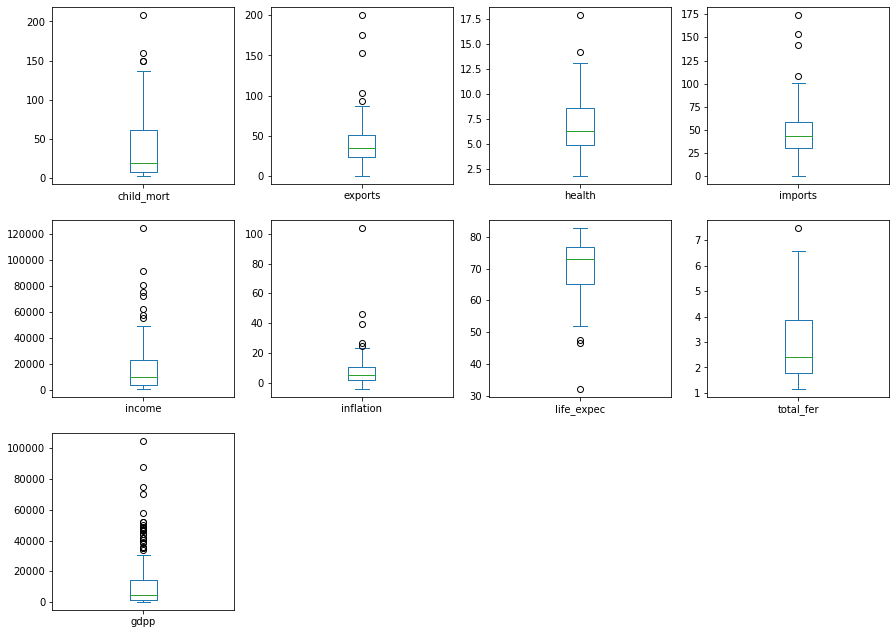

In [49]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

In [50]:
for i in ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']:
 Q1=np.percentile(data[i],25, interpolation ='midpoint')
 Q2=np.percentile(data[i],50, interpolation ='midpoint')
 Q3=np.percentile(data[i],75, interpolation ='midpoint')
IQR =Q3-Q1
lowlim= Q1-1.5*IQR
uplim =Q3+1.5*IQR
ind1 =data[i]>uplim
data.drop(data.loc[ind1].index,inplace =True)
ind2=data[i]<lowlim
data.drop(data.loc[ind2].index,inplace =True)

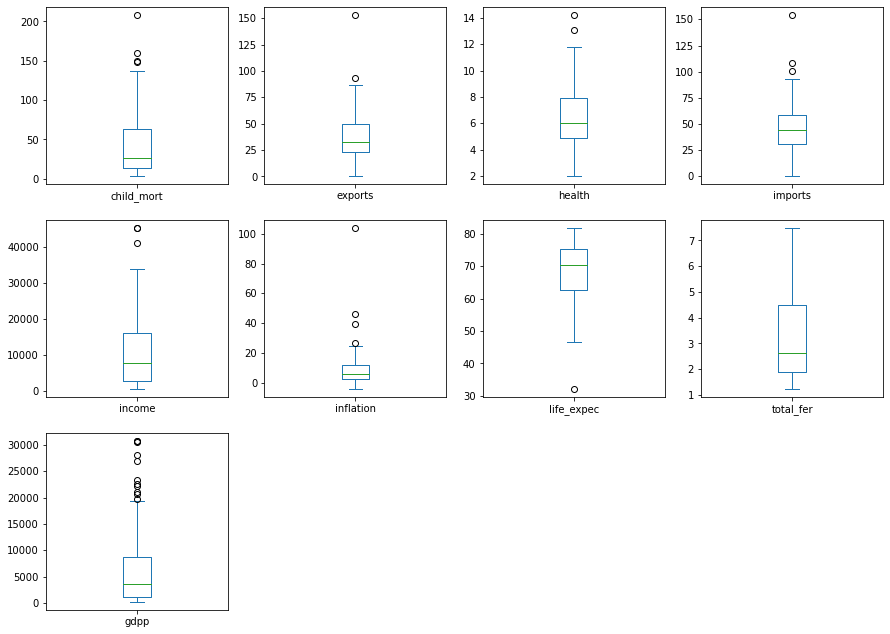

In [51]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

In [53]:
df=data.drop(['country'],axis=1)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# K-means clustering

C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


20934136911.536076
6624634028.520088
2954148183.501383
1952963964.4427009
1398600128.5442848
995540492.8622046
760613285.712276
632989957.635352
548174274.1607919
481910086.6450337


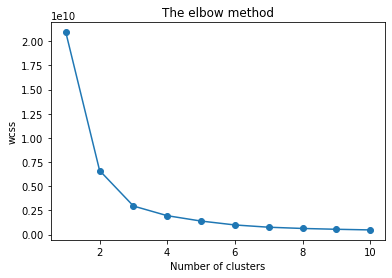

In [54]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

the optimum number of cluster is 3.

In [55]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
y_kmeans

array([0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0])

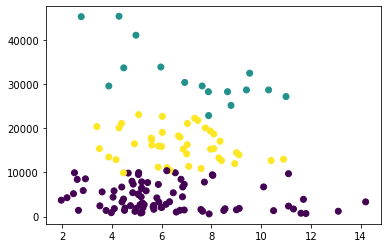

In [58]:
health=df['health']
inc=df['income']
plt.scatter(health,inc,c=y_kmeans)

In [59]:
data['Cluster']=y_kmeans
data['Cluster'].value_counts()

0    84
2    42
1    16
Name: Cluster, dtype: int64

In [60]:
df1 = data[data['Cluster']==0].country

In [61]:
list(df1)

['Afghanistan',
 'Albania',
 'Angola',
 'Armenia',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Fiji',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Jamaica',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Tunisi

Countries present in cluster 0 needs more help from HELP International NGO because this model predicted that cluster 0 countries have less income and health while comparing with other countries.So the above countries in the cluster 0 needs aid and are the underdeveloped countries